# **Is There a Correlation Between the Descriptive Metrics of Songs Provided by Spotify and Song Popularity on Various Platforms?**


## **1.0 Overview**

---

**1.1 Analyzing YouTube Popularity of Songs Against Spotify Metrics**



The application Spotify contains a wide range of songs, intended to fit any user’s music taste and preferred genre. To determine whether the future popularity of these songs can be predicted based on their inherent characteristics, correlations must be investigated between a known set of song metrics and song popularity at various times on several platforms.

Songs from the chosen Spotify dataset (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) are described using the following metrics:

Numerical:

* acousticness (Ranges from 0 to 1)
* danceability (Ranges from 0 to 1)
* energy (Ranges from 0 to 1)
* duration_ms (Integer typically ranging from 200k to 300k)
* instrumentalness (Ranges from 0 to 1)
* valence (Ranges from 0 to 1)
* popularity (Ranges from 0 to 100)
* tempo (Float typically ranging from 50 to 150)
* liveness (Ranges from 0 to 1)
* loudness (Float typically ranging from -60 to 0)
* speechiness (Ranges from 0 to 1)
* year (Ranges from 1921 to 2020)

Dummy:

* mode (0 = Minor, 1 = Major)
* explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

* key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
* artists (List of artists mentioned)
* release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
* name (Name of the song)



---

Questions to answer:


*   What correlations, if any, exist between a song's YouTube popularity and its Spotify metrics?
*   What Spotify musical factor was maximized among the most popular songs on YouTube?

This analysis will measure the popularity of a song on YouTube using the number of views that the video for that song has. 

This analysis had planned to use the official YouTube API to collect view counts for each song in the Spotify dataset, but it was discovered that this approach would not work due to limitations with the YouTube API. 

The YouTube API limits users to 10,000 credits per day, and a single video search requires 200 credits. This means only 50 datapoints could be collected per day. Instead, web scraping will be used to collect view counts for each song. 





## **2.0 Gathering and Preparing the Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Will use Google Drive to store Spotify data
# Import Drive API and authenticate.
#from google.colab import drive

# Mount your Drive to the Colab VM.
#drive.mount('/gdrive')

Mounted at /gdrive


### **2.1 Spotify Data**

As you can see above, the Spotify dataset contains nearly over 170k rows. 
We'll clean up the Spotify dataset before we do any further work.

In [7]:
# Read in the Spotify dataset from Google Drive
spotify_data = pd.read_csv('data.csv')

# Keep columns that will be useful for this analysis
spotify_data = pd.DataFrame(spotify_data, columns=["name","artists","year","popularity","acousticness",\
    "danceability","energy","duration_ms","instrumentalness","valence","tempo","liveness","loudness","speechiness"])
spotify_data

,name,artists,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,Keep A Song In Your Soul,['Mamie Smith'],1920,12,0.991000,0.598,0.224,168333,0.000522,0.6340,149.976,0.3790,-12.628,0.0936
1,I Put A Spell On You,"[""Screamin' Jay Hawkins""]",1920,7,0.643000,0.852,0.517,150200,0.026400,0.9500,86.889,0.0809,-7.261,0.0534
2,Golfing Papa,['Mamie Smith'],1920,4,0.993000,0.647,0.186,163827,0.000018,0.6890,97.600,0.5190,-12.098,0.1740
3,True House Music - Xavier Santos & Carlos Gomi...,['Oscar Velazquez'],1920,17,0.000173,0.730,0.798,422087,0.801000,0.0422,127.997,0.1280,-7.311,0.0425
4,Xuniverxe,['Mixe'],1920,2,0.295000,0.704,0.707,165224,0.000246,0.2990,122.076,0.4020,-6.036,0.0768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,The One,"['DJ Combo', 'Sander-7', 'Tony T']",2020,0,0.009170,0.792,0.866,147615,0.000060,0.1860,125.972,0.1780,-5.089,0.0356
174385,A Little More,['Alessia Cara'],2021,0,0.795000,0.429,0.211,144720,0.000000,0.2280,94.710,0.1960,-11.665,0.0360
174386,Together,['Roger Fly'],2020,0,0.806000,0.671,0.589,218147,0.920000,0.7140,108.058,0.1130,-12.393,0.0282
174387,champagne problems,['Taylor Swift'],2021,69,0.920000,0.462,0.240,244000,0.000000,0.3200,171.319,0.1130,-12.077,0.0377


In [8]:
# Drop entries where the name and artists are duplicates
spotify_data = spotify_data.drop_duplicates(subset=['name', 'artists'])

spotify_data.reset_index(drop=True, inplace=True)

spotify_data

,name,artists,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,Keep A Song In Your Soul,['Mamie Smith'],1920,12,0.991000,0.598,0.2240,168333,0.000522,0.6340,149.976,0.3790,-12.628,0.0936
1,I Put A Spell On You,"[""Screamin' Jay Hawkins""]",1920,7,0.643000,0.852,0.5170,150200,0.026400,0.9500,86.889,0.0809,-7.261,0.0534
2,Golfing Papa,['Mamie Smith'],1920,4,0.993000,0.647,0.1860,163827,0.000018,0.6890,97.600,0.5190,-12.098,0.1740
3,True House Music - Xavier Santos & Carlos Gomi...,['Oscar Velazquez'],1920,17,0.000173,0.730,0.7980,422087,0.801000,0.0422,127.997,0.1280,-7.311,0.0425
4,Xuniverxe,['Mixe'],1920,2,0.295000,0.704,0.7070,165224,0.000246,0.2990,122.076,0.4020,-6.036,0.0768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159436,I giorni,"['Ludovico Einaudi', 'Johannes Bornlöf']",2021,0,0.976000,0.358,0.1210,381150,0.889000,0.1060,131.808,0.1350,-25.111,0.0532
159437,Nuvole bianche,"['Ludovico Einaudi', 'Johannes Bornlöf']",2021,0,0.995000,0.297,0.0287,349200,0.908000,0.0678,141.636,0.0995,-30.008,0.0564
159438,Una Mattina,"['Ludovico Einaudi', 'Johannes Bornlöf']",2021,0,0.995000,0.343,0.0165,206700,0.878000,0.1510,126.970,0.0774,-30.915,0.0455
159439,Night,"['Ludovico Einaudi', 'Johannes Bornlöf']",2021,0,0.988000,0.316,0.0573,303333,0.879000,0.0373,81.070,0.1200,-24.121,0.0515


With the Spotify data cleaned up and stored in a dataframe, the next step is to gather data on the number of YouTube views for each song.

YouTube has an official API, but it limits use to 10,000 credits per day. A single search query uses 200 credits, so one could only collect view counts for a maximum of fifty songs per day.

To get around this limit, web scraping can be used. YouTube is a Javascript-heavy webpage, so classic HTML scraping with a library such as BeautifulSoup does not work.

Selenium Webdriver allows us to render YouTube webpages in the exact same way that they are rendered within Google Chrome. 

The next few codeblocks are used to set up Selenium.

### **2.2 YouTube Data**

In [ ]:
# Install Selenium Webdriver so that we can render YouTube webpages
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')


In [42]:
# Configure the webdriver
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


In [45]:
# Youtube Data will be stored and retrieved from Google Drive
youtube_data = pd.read_csv(open('/gdrive/My Drive/youtube_data.csv', 'r'))

In order to scrape YouTube, we'll use it's search page to find the top video matching the name and artists of each song. We'll the retrieve the view count for this video and store it.

In [44]:
# The URL to Youtube's search page
search_url = "https://www.youtube.com/results?search_query="

In [ ]:
# This loop goes through every single song in our Spotify dataframe and attempts to scrape it's viewcount from YouTube.
for index, row in spotify_data.iterrows():

  # If our YouTube Data already contains this name + artist combo, we don't need to scrape it again
  if((row['name'] == youtube_data['name']).any() and (row['artists'] == youtube_data['artists']).any()):
    continue
  
  try:
    # Setup the search params for the Youtube query by combining the song name and it's artists into a single string
    search_params = row['name'] + " " + row['artists'].replace("[", "").replace("]", "")
    
    # Make a request to the URL with the query parameters that we just determined
    driver.get(search_url + search_params)

    # Find the first element with the video-title ID. This will be the first video in the search results
    video_element = driver.find_element_by_id(id_='video-title')

    # Fetch the video's aria-label attribute. This label contains the exact view count for the video in question
    label = video_element.get_attribute('aria-label')

    # If there is no aria label present, move onto the next song
    if label is None:
      continue 

    # Retrieve the Youtube Video name from the video-title element  
    video_title = video_element.text

    # Use a regular expression to extract the comma separated viewcount from the aria label
    view_count_match = re.search('\d+(?:[\d,.]*\d)(?= views)', label)
    
    # Go to the next song if we can't find the view count within the aria label
    if view_count_match is None:
      continue 
    
    # Remove commas from the view count
    view_count = view_count_match.group(0).replace(",", "")
    
    # Create a row containing the song name, artists, views and youtube title
    new_data = { 'name': row['name'], 'artists': row['artists'], 'views': view_count, 'youtube_title': video_title }

    # Add the new song data to the YouTube dataframe
    youtube_data = youtube_data.append(new_data, ignore_index=True)

    # Every 20 songs, save our data to Google Drive so we don't lose it
    if index % 20 == 0:
      # Write the DataFrame to CSV file.
      with open('/gdrive/My Drive/youtube_data.csv', 'w') as f:
        youtube_data.to_csv(f)

  except NoSuchElementException:
    # Handle NoSuchElementException (this occurs when there are no YouTube results matching the query string)
    print("No element for " + row['name'] + " " + row['artists'])

The above scraper takes a significant amount of time to gather view counts for a large number of songs.

To collect the data that is currently present in youtube_data.csv, it ran for roughly 48 hours.

## **3.0 Analysis**

In [9]:
# Reload the latest Youtube data from Google Drive
youtube_data = pd.read_csv('youtube_data.csv')

# Join Youtube data and Spotify data on song name and artists
combined = pd.merge(spotify_data, youtube_data, how="inner", on=("name", "artists"))

# Drop duplicates, just incase there are any
combined = combined.drop_duplicates(subset=['name', 'artists'])

combined

,name,artists,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,views,youtube_title
0,Keep A Song In Your Soul,['Mamie Smith'],1920,12,0.991000,0.598,0.224,168333,0.000522,0.6340,149.976,0.3790,-12.628,0.0936,1877,Mamie Smith - Keep A Song In Your Soul
2,I Put A Spell On You,"[""Screamin' Jay Hawkins""]",1920,7,0.643000,0.852,0.517,150200,0.026400,0.9500,86.889,0.0809,-7.261,0.0534,1017478,Screaming Jay Hawkins - I Put a Spell on You (...
3,Golfing Papa,['Mamie Smith'],1920,4,0.993000,0.647,0.186,163827,0.000018,0.6890,97.600,0.5190,-12.098,0.1740,377,Mamie Smith - Golfing Papa
4,True House Music - Xavier Santos & Carlos Gomi...,['Oscar Velazquez'],1920,17,0.000173,0.730,0.798,422087,0.801000,0.0422,127.997,0.1280,-7.311,0.0425,1125,True House Music (Xavier Santos & Carlos Gomix...
5,Xuniverxe,['Mixe'],1920,2,0.295000,0.704,0.707,165224,0.000246,0.2990,122.076,0.4020,-6.036,0.0768,733,MiXE - XUniverxe (Official Music Video)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49175,Doubt,['Twenty One Pilots'],2015,69,0.121000,0.719,0.645,191493,0.003160,0.6900,123.020,0.3620,-6.141,0.0358,50527246,twenty one pilots - Doubt (Official Audio)
49176,No Guts No Glory - Defqon.1 Anthem 2015,"['Ran-D', 'Skits Vicious']",2020,23,0.010300,0.404,0.957,358536,0.009540,0.1500,150.428,0.2930,-3.275,0.0874,2472966,"Ran-D ft. Skits Vicious - No Guts, No Glory (D..."
49177,Hands To Myself,['Selena Gomez'],2015,64,0.014700,0.811,0.499,200680,0.000002,0.4660,111.016,0.3420,-7.161,0.1180,406959728,Selena Gomez - Hands To Myself
49178,I Want You with Me - 2015 Japan Remaster,['Bread'],2017,5,0.752000,0.639,0.287,172800,0.590000,0.4220,120.066,0.0649,-15.951,0.0276,1503,I Want You with Me (2015 Japan Remaster)


In [12]:
# Import tools for statistical analysis
import seaborn as sns

,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,views
year,1.000000,0.638734,-0.654194,0.102629,0.586131,0.109196,-0.206769,-0.039537,0.147888,-0.005126,0.488417,-0.220832,0.197044
popularity,0.638734,1.000000,-0.506068,0.136857,0.415671,0.088957,-0.338092,0.038696,0.101813,-0.114789,0.398417,-0.237884,0.235645
acousticness,-0.654194,-0.506068,1.000000,-0.215221,-0.754899,-0.092212,0.282455,-0.144821,-0.197713,-0.021801,-0.533377,-0.037578,-0.133665
danceability,0.102629,0.136857,-0.215221,1.000000,0.166025,-0.114815,-0.234542,0.552532,-0.013232,-0.104459,0.216298,0.247512,0.093972
energy,0.586131,0.415671,-0.754899,0.166025,1.000000,0.055143,-0.210525,0.318653,0.249724,0.114376,0.775187,-0.129449,0.117459
duration_ms,0.109196,0.088957,-0.092212,-0.114815,0.055143,1.000000,0.041608,-0.183998,-0.023405,0.028183,0.028633,-0.085052,0.012688
instrumentalness,-0.206769,-0.338092,0.282455,-0.234542,-0.210525,0.041608,1.000000,-0.177298,-0.072866,-0.030321,-0.341134,-0.127987,-0.079336
valence,-0.039537,0.038696,-0.144821,0.552532,0.318653,-0.183998,-0.177298,1.000000,0.173203,-0.007254,0.294251,0.047596,-0.004521
tempo,0.147888,0.101813,-0.197713,-0.013232,0.249724,-0.023405,-0.072866,0.173203,1.000000,-0.003963,0.206116,-0.042527,0.020323
liveness,-0.005126,-0.114789,-0.021801,-0.104459,0.114376,0.028183,-0.030321,-0.007254,-0.003963,1.000000,0.055609,0.117951,-0.030012


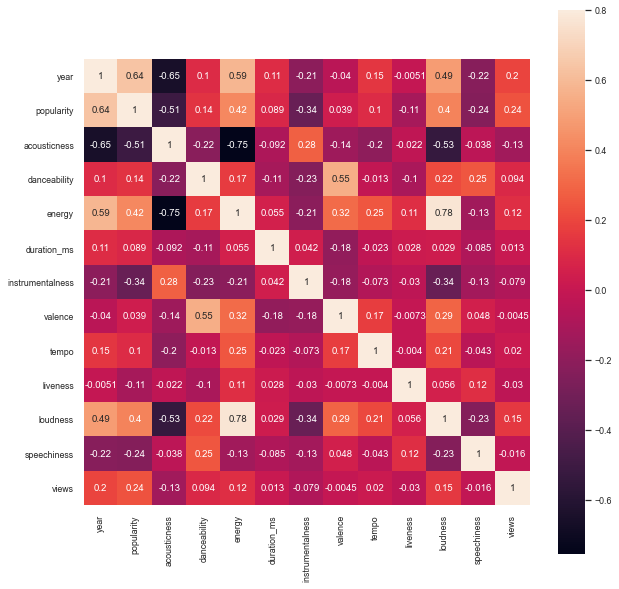

In [15]:
# Generate a correlation matrix of views and the relevant spotify song attributes/ pearson
fig, ax = plt.subplots(figsize=(10,10))
corrmat = combined.corr()
sns.set(font_scale=0.8)
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
corrmat

,year,popularity,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness,views
year,1.000000,0.662237,-0.674408,0.091297,0.588305,0.288127,-0.196699,-0.041284,0.163030,-0.078001,0.537157,-0.144605,0.599817
popularity,0.662237,1.000000,-0.522788,0.123070,0.437969,0.292685,-0.308978,0.027738,0.105925,-0.149687,0.432973,-0.221674,0.821894
acousticness,-0.674408,-0.522788,1.000000,-0.178341,-0.762853,-0.233204,0.260780,-0.117025,-0.230891,0.015833,-0.576097,0.005129,-0.541922
danceability,0.091297,0.123070,-0.178341,1.000000,0.163640,-0.080501,-0.248737,0.528314,0.003933,-0.119876,0.167029,0.263787,0.173239
energy,0.588305,0.437969,-0.762853,0.163640,1.000000,0.187775,-0.154866,0.331945,0.271577,0.055849,0.812705,0.039338,0.454783
duration_ms,0.288127,0.292685,-0.233204,-0.080501,0.187775,1.000000,0.065752,-0.192615,-0.002763,-0.103156,0.164067,-0.139181,0.270720
instrumentalness,-0.196699,-0.308978,0.260780,-0.248737,-0.154866,0.065752,1.000000,-0.146864,-0.033535,-0.051599,-0.253267,-0.073575,-0.344829
valence,-0.041284,0.027738,-0.117025,0.528314,0.331945,-0.192615,-0.146864,1.000000,0.170536,-0.018308,0.248567,0.147886,0.064615
tempo,0.163030,0.105925,-0.230891,0.003933,0.271577,-0.002763,-0.033535,0.170536,1.000000,-0.013717,0.213717,0.060597,0.115397
liveness,-0.078001,-0.149687,0.015833,-0.119876,0.055849,-0.103156,-0.051599,-0.018308,-0.013717,1.000000,0.020332,0.129432,-0.115191


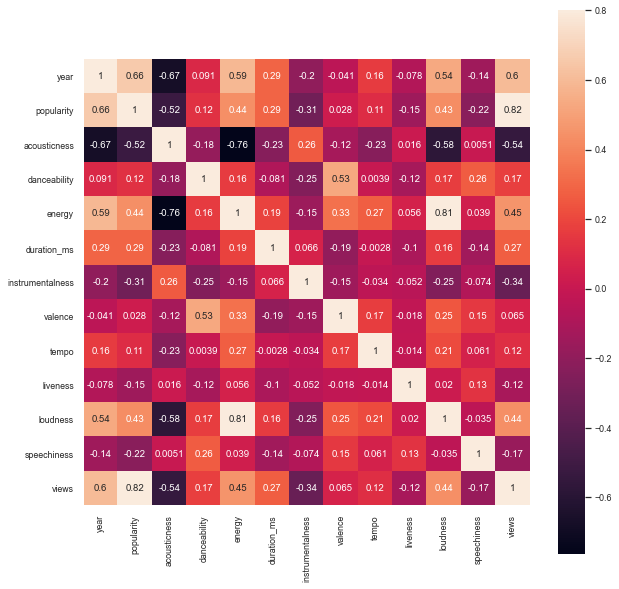

In [17]:
# Generate a correlation matrix of views and the relevant spotify song attributes/spearman
fig, ax = plt.subplots(figsize=(10,10))
corrmat = combined.corr(method='spearman')
sns.set(font_scale=0.8)
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
corrmat

<Figure size 864x216 with 0 Axes>

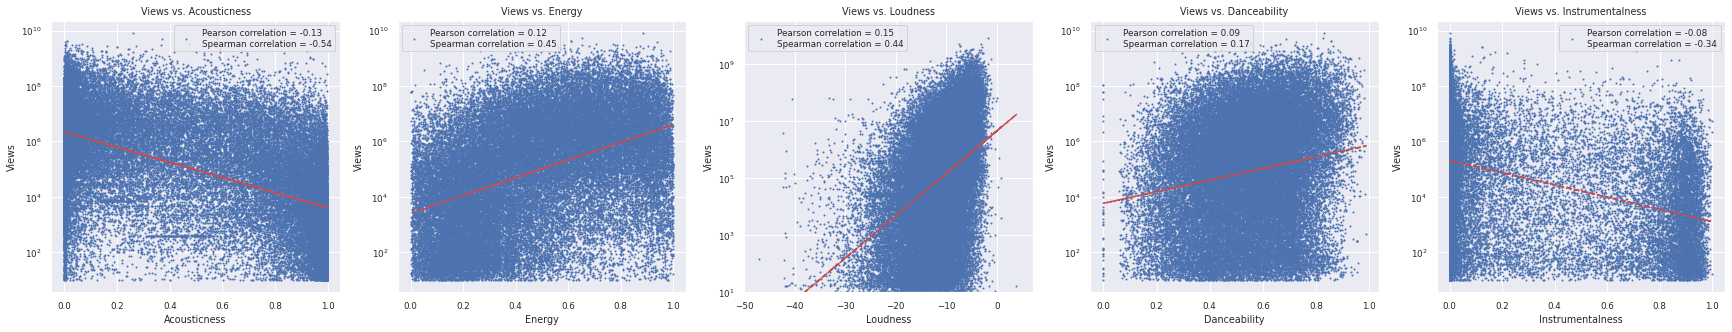

In [62]:
# Create a scatter plot of select spotify attributes taken from the correlation matrix above
features = ['acousticness', 'energy', 'loudness', 'danceability', 'instrumentalness']
target = combined['views']

fig = plt.gcf()
fig.set_size_inches((12,3))
plt.figure(figsize=(30, 5))

# Create a scatter plot for each attribute versus views
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = combined[col]
    y = target

    # Create the scatter plot, label both pearson and spearman correlations on the plot
    plt.scatter(x, y, marker='o', s = 1, label=f'Pearson correlation = {np.round(np.corrcoef(x,y)[0,1], 2)}' + '\n' + f'Spearman correlation = {np.round(stats.spearmanr(x,y)[0], 2)}')

    # Create a trendline for the data
    z = np.polyfit(x, np.log10(y), 1)
    p = np.poly1d(z)
    plt.plot(x, 10**p(x), "r--")
    
    # Use log scale, as YouTube view counts range from 0 to almost 10 billion
    plt.yscale('log')

    # Fix the y axis on the loudness plot
    if(col == 'loudness'):
       plt.axis([-50, None, 10, None])

    # Setup plot labels
    plt.title(f"Views vs. {col.title()}")
    plt.xlabel(col.title())
    plt.ylabel('Views')
    plt.legend()
    

## **4.0 Conclusions**


---
The Spearman correlation between YouTube views and acousticness, energy, loudness, and danceability appears to suggest a medium level of correlation.

The Pearson correlation is more sensetive to outliers than the Spearman correlation, and our dataset appears to have a number of outliers (songs with higher view counts than most).

Based on the Spearman correlation, the following conclusions can be made:


*   Non-acoustic songs are likely to recieve more views
*   Songs with higher energy are likely to recieve more views
*   Loud songs are more likely to recieve more views
*   Instrumental songs are less likely to recieve many views.


